# Alpha-beta pruning tic-tac-toe

This notebook contains an implementation of alpha-beta pruning algorithm for tic-tac-toe. This algorithms purpose is to reduce search space for the **mini-max** algorithm in order to increase computational performance.

## Traditional mini-max

The traditional mini-max algorithm (described in previous sections) produces a full search space (in the form of a min-max tree), whereby the different levels of the tree consist of **turns** of possible moves for each of the two players. 

The code for this algorithm is the following:

In [13]:
def is_game_over(node):
    winning_indexes = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [0, 3, 6], [1, 4, 7], [2, 5, 8], [0, 4, 8], [2, 4, 6]]
    
    for indexes in winning_indexes:
        hit_count = 0
        chosen_symbol = node[indexes[0]]

        for index in indexes:
            if node[index] != -1 and node[index] == chosen_symbol:
                hit_count = hit_count + 1
        
        if hit_count == 3:
            return True, chosen_symbol

    if node.count(-1) == 0:
        return True, None
    
    return False, None

def generate_children(node, chosen_symbol):
    children = []

    for i in range(len(node)):
        if node[i] == -1:
            child = node.copy()
            child[i] = chosen_symbol

            children.append(child)
    
    return children

def alternate_symbol(symbol):
    return 'o' if symbol == 'x' else 'x'
    
def mini_max(node, is_maximizing_player_turn, chosen_symbol):
    game_result = is_game_over(node)

    if game_result[0]:
        if game_result[1] is None:
            return 0, node
        elif is_maximizing_player_turn:
            return -1, node
        else:
            return 1, node

    children = generate_children(node, chosen_symbol)
    children_results = list(map(
        lambda child: [
            mini_max(child, not is_maximizing_player_turn, alternate_symbol(chosen_symbol))[0],
            child
        ],
        children
    ))

    return max(children_results, key=str) if is_maximizing_player_turn else min(children_results, key=str)

## Alpha-beta pruning

However, the creation of the full tree is not entirely necessary, this is because some subtrees in a turn can be guaranteed to produce a less optimal outcome for a player by just evaluating one or some of the terminal nodes. An example can be seen below:

![Alpha-beta Tree](resources/alpha-beta-tree.png)

The nodes marked with a question mark are not evaluated. The following process leads to this tree:

1. The left subtree is evaluated with a result of 3 for the black player
2. The first terminal node of the right subtree is 1 for the white player
3. The parent node of the 1 does not need to evaluate the next node, given that the white player already has a higher score than 1 (3), so the black player wont chose any other value of the node that isn't <= 1 (remember the black player is minimizing the score)
4. The black player node is guaranteed to be <= 1 so it takes that value
5. The next two white nodes are evaluated as 5 and 2 (2 cannot be pruned, since 5 would be a better outcome for white, so it must evaluate more nodes) and the black player takes a value of 2
6. The white player takes the value of two
7. Since 2 is already a lower score than 3, black need not evaluate more nodes, as the result is guaranteed to be <= 2
8. White chooses 3

A video explanation follows (minute 5:13):

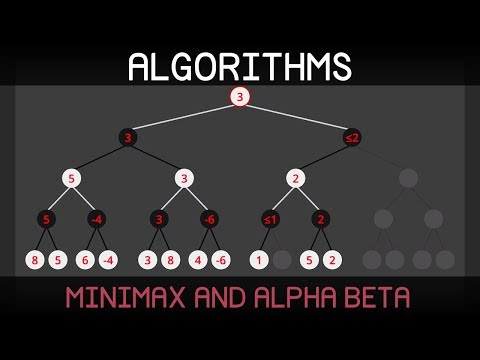

In [14]:
from IPython.display import YouTubeVideo

YouTubeVideo("l-hh51ncgDI")

The algorithm for alpha-beta pruning is a slightly modified version of the mini-max algorithm:

In [15]:
def mini_max_ab(node, is_maximizing_player_turn, chosen_symbol, alpha, beta):
    game_result = is_game_over(node)

    if game_result[0]:
        if game_result[1] is None:
            return 0, node
        elif is_maximizing_player_turn:
            return -1, node
        else:
            return 1, node

    children = generate_children(node, chosen_symbol)

    if is_maximizing_player_turn:
        max_score = -10
        max_child = None

        for child in children:
            child_result = mini_max_ab(child, not is_maximizing_player_turn, alternate_symbol(chosen_symbol), alpha, beta)

            if child_result[0] > max_score:
                max_child = child
                max_score = child_result[0]

            if child_result[0] > alpha:
                alpha = child_result[0]
            
            if beta <= alpha:
                break
                
        return max_score, max_child
    else:
        min_score = 10
        min_child = None

        for child in children:
            child_result = mini_max_ab(child, not is_maximizing_player_turn, alternate_symbol(chosen_symbol), alpha, beta)

            if child_result[0] < min_score:
                min_child = child
                min_score = child_result[0]

            if child_result[0] < beta:
                beta = child_result[0]
            
            if beta <= alpha:
                break
            
        return min_score, min_child

# Alpha-beta pruning Dots and Boxes

Dots and boxes is a game that consists of drawing boxes on a grid of dots, the player that has the most boxes at the end will win the game. Simple right? The rules are the following:

1. Playing is turn based
2. A turn consists of a player drawing a colored line
    a. If the line completes a box (doesn't matter if box has multi-colored lines), the player may draw another line, repeating until option **b** is met or the game is over
    b. If the line does not complete a box, the next player will play
3. The winner is the player with most points when the game is over

An example of this game can be seen here:

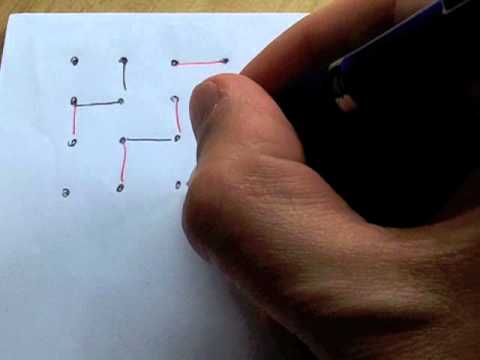

In [16]:
YouTubeVideo("FLNPAKBJavY")

This game, as complex as it may seem, is still a zero-sum game of perfect information.

The search space for this game can get really big really quickly, for example, in just a game of 3x3 dots:

````
       1     2
    O-----O-----O
    |     |     |
   3|    4|    5|
    |  6  |  7  |
    O-----O-----O
    |     |     |
  8 |    9|   10|
    |     |     |
    O-----O-----O
       11    12
```

There are 12 possible lines to be drawn. A game of 4x3 has 17 possibilities, a game of 4x4 has 24, etc. In general, a game consisting of a grid of **mxn** dots has *(m-1)n + m(n-1)* possible lines. This makes the resulting mini-max tree very large and it becomes necessary to prune it.

Your assignment is to see how big a board you can make your AI play without each move taking too long (less than 1 minute)!

As help, the following code defines the outline of your algorithm, all you need to do is to complete the **** functions and add the console interaction for the game.

In [17]:
# Receives:
#   node: the current game state
#   player_symbol: the symbol chosen by the player
# Returns a pair (bool, symbol) representing if the game is over and which player (represented by a symbol) won
def is_game_over_dots(node, chosen_symbol):
    if None in node[0]:
        return False, None
    if node[1] == node[2]:
        return True, None
    elif node[1] > node[2]:
        return True, chosen_symbol
    else:
        return True, alternate_symbol(chosen_symbol)

# Receives:
#   game_result: a pair returned from is_game_over_dots
#   node: current game state
#   is_maximizing_player_turn: a bool indicating if it's the turn of the maximizing player
# Returns a pair (number, node) representing the evaluation of the current board state depending on the current player
def evaluate_game_dots(game_result, node, is_maximizing_player_turn):
    return 0, node

# Receives:
#   node: current game state
#   chose_symbol: a character representing the current player
# Returns a list of nodes representing the possible moves to make for the current player in the current state
def generate_children_dots(node, chosen_symbol):
    return []

# Receives:
#   symbol: a character representing a player
# Returns a pair (number, node) representing the evaluation of the current board state depending on the current player
def alternate_symbol_dots(symbol):
    return "+" if symbol == "-" else "-"

def mini_max_ab(node, is_maximizing_player_turn, chosen_symbol, alpha, beta, depth):
    game_result = is_game_over_dots(node, chosen_symbol)

    if depth == 0 or game_result[0]:
        return evaluate_game_dots(game_result, node, is_maximizing_player_turn)

    children = generate_children_dots(node, chosen_symbol)

    if is_maximizing_player_turn:
        max_score = -1000000
        max_child = None

        for child in children:
            child_result = mini_max_ab(child, not is_maximizing_player_turn, alternate_symbol_dots(chosen_symbol), alpha, beta, depth - 1)

            if child_result[0] > max_score:
                max_child = child
                max_score = child_result[0]

            if child_result[0] > alpha:
                alpha = child_result[0]
            
            if beta <= alpha:
                break
                
        return max_score, max_child
    else:
        min_score = 1000000
        min_child = None

        for child in children:
            child_result = mini_max_ab(child, not is_maximizing_player_turn, alternate_symbol_dots(chosen_symbol), alpha, beta, depth - 1)

            if child_result[0] < min_score:
                min_child = child
                min_score = child_result[0]

            if child_result[0] < beta:
                beta = child_result[0]
            
            if beta <= alpha:
                break
            
        return min_score, min_child

# The game

Below is a playable dots and boxes game that uses your implementation of the algorithm.

In [18]:
import re
import copy

DOT = 'O'
LINE_SIZE = 3

def get_size_input():
    print("Please input size of game as two space separated digits m (rows) and n (columns) larger than 1 (e.g. \"2 3\")")

    player_input = input()
    match = re.search("(\d{2,}|[2-9]) (\d{2,}|[2-9])", player_input.strip())

    if not match:
        print("Input is incorrect, try again")

        return get_size_input()
    else:
        return list(map(int, match.group().split()))
    
def get_odd_row(node, row, cols):
    [start, end] = [
        int(int((row/2)) * (2 * cols - 1) + cols - 1),
        int(int((row/2)) * (2 * cols - 1) + cols - 1 + cols)
    ]
    row_nodes = node[start:end]
    
    row = ""
    
    for col in range(2 * cols - 1):
        if col % 2 != 0:
            row = row + " " * LINE_SIZE
        else:
            head_symbol = row_nodes.pop(0)
            symbol = " " if head_symbol is None else head_symbol

            row = row + symbol
    
    return row

def get_even_row(node, row, cols):
    [start, end] = [
        int((row/2) * (2 * cols - 1)),
        int((row/2) * (2 * cols - 1) + cols - 1)
    ]
    row_nodes = node[start:end]
    
    row = ""
    
    for col in range(2 * cols - 1):
        if col % 2 == 0:
            row = row + DOT
        else:
            head_symbol = row_nodes.pop(0)
            symbol = " " if head_symbol is None else head_symbol
            
            row = row + symbol * LINE_SIZE
    
    return row

def print_node(node, rows, cols):
    rows_node = ""

    for row in range(2 * rows - 1):
        if row % 2 != 0: # Odd
            rows_node = rows_node + (get_odd_row(node[0], row, cols) + "\n") * LINE_SIZE
        else: # Even
            rows_node = rows_node + get_even_row(node[0], row, cols) + "\n"
    
    print(rows_node)
    print("Player score: " + str(node[1]))
    print("Machine score: " + str(node[2]))

def get_player_symbol():
    print("Please pick one of the following symbols: + or -")
    
    player_input = input()
    
    if player_input not in ["+", "-"]:
        print("Incorrect symbol, please try again")
        
        return get_player_symbol()
    else:
        return player_input

def check_vertical_box(node, line, cols):
    top_top = line - (2 * cols - 1)
    top_left = line - cols
    top_right = line - cols + 1
    top_bottom = line

    bottom_top = line
    bottom_left = line + cols - 1
    bottom_right = line + cols
    bottom_bottom = line + (2 * cols - 1)

    top_indices = [top_top, top_left, top_right, top_bottom]
    bottom_indices = [bottom_top, bottom_left, bottom_right, bottom_bottom]
        
    score = 0
    
    if min(top_indices) >= 0:
        top_symbols = [node[0][top_top], node[0][top_left], node[0][top_right], node[0][top_bottom]]
        
        if None not in top_symbols:
            score = score + 1
    if max(bottom_indices) < len(node[0]):
        bottom_symbols = [node[0][bottom_top], node[0][bottom_left], node[0][bottom_right], node[0][bottom_bottom]]

        if None not in bottom_symbols:
            score = score + 1
    
    return score

def check_horizontal_box(node, line, cols):
    left_top = line - cols
    left_left = line - 1
    left_right = line
    left_bottom = line + cols - 1

    right_top = line - cols + 1
    right_left = line
    right_right = line + 1
    right_bottom = line + cols

    left_indices = [left_top, left_left, left_right, left_bottom]
    right_indices = [right_top, right_left, right_right, right_bottom]
    
    score = 0
    
    if min(left_indices) >= 0:
        left_symbols = [node[0][left_top], node[0][left_left], node[0][left_right], node[0][left_bottom]]
        
        if None not in left_symbols:
            score = score + 1
    if max(right_indices) < len(node[0]):
        bottom_symbols = [node[0][right_top], node[0][right_left], node[0][right_right], node[0][right_bottom]]

        if None not in bottom_symbols:
            score = score + 1
    
    return score

def check_box_complete(node, line, rows, cols):
    row_num = -1
    
    for row in range(2 * rows - 1):
        start, end = -1, -1

        if row % 2 == 0:
            start, end = [
                int((row/2) * (2 * cols - 1)),
                int((row/2) * (2 * cols - 1) + cols - 1)
            ]
        else:
            start, end = [
                int(int((row/2)) * (2 * cols - 1) + cols - 1),
                int(int((row/2)) * (2 * cols - 1) + cols - 1 + cols)
            ]
        if start <= line < end:
            row_num = row
            break
    
    if row_num % 2 == 0:
        return check_vertical_box(node, line, cols)
    else:
        return check_horizontal_box(node, line, cols)

def player_turn(node, player_symbol, number_of_lines, rows, cols):
    print("Please chose a number between 0 and " + str(number_of_lines - 1) + ":")
    
    player_input = input().strip()
    match = re.search("\d+", player_input)
    new_node = copy.deepcopy(node)

    if not match:
        print("Input is not a number, please try again")
        
        return player_turn(node, player_symbol, number_of_lines, rows, cols)
    elif int(match.group()) < 0 or int(match.group()) > number_of_lines - 1:
        print("Number is not in the correct range, please try again")
        
        return player_turn(node, player_symbol, number_of_lines, rows, cols)
    elif new_node[0][int(match.group())] is not None:
        print("Line already taken, try again")

        return player_turn(node, player_symbol, number_of_lines, rows, cols)
    else:
        line = int(match.group())
        new_node[0][line] = player_symbol
        new_node[1] = new_node[1] + check_box_complete(new_node, line, rows, cols)

        return new_node


def machine_turn(node, player_symbol, rows, cols): # TODO: This is where you should use your mini-max algorithm with alpha-beta pruning
    new_node = copy.deepcopy(node)
    
    for line in range(len(node[0])):
        if new_node[0][line] is None:
            new_node[0][line] = alternate_symbol_dots(player_symbol)
            new_node[2] = new_node[2] + check_box_complete(new_node, line, rows, cols)

            break
    
    return new_node

def play():
    [m, n] = get_size_input()

    number_of_lines = ((m-1)*n + m*(n-1))    
    node = [[None] * number_of_lines, 0, 0] # First element is lines drawn, second and third are player and machine scores respectively
    turns = number_of_lines

    player_symbol = get_player_symbol()
    
    is_player_turn = True

    print("\n\nEstado inicial del tablero:")
    print_node(node, m, n)

    while turns > 0:
        turns = turns - 1

        if is_player_turn:
            node = player_turn(node, player_symbol, number_of_lines, m, n)
        else:
            node = machine_turn(node, player_symbol, m, n)

        player = " (jugador)" if is_player_turn else " (maquina)"
        print("\n\nTurno # " + str(abs(turns - number_of_lines)) + player)
        print_node(node, m, n)
        
        is_player_turn = not is_player_turn
play()

Please input size of game as two space separated digits m (rows) and n (columns) larger than 1 (e.g. "2 3")
Please pick one of the following symbols: + or -


Estado inicial del tablero:
O   O   O
         
         
         
O   O   O

Player score: 0
Machine score: 0
Please chose a number between 0 and 6:


Turno # 1 (jugador)
O+++O   O
         
         
         
O   O   O

Player score: 0
Machine score: 0


Turno # 2 (maquina)
O+++O---O
         
         
         
O   O   O

Player score: 0
Machine score: 0
Please chose a number between 0 and 6:


Turno # 3 (jugador)
O+++O---O
+        
+        
+        
O   O   O

Player score: 0
Machine score: 0


Turno # 4 (maquina)
O+++O---O
+   -    
+   -    
+   -    
O   O   O

Player score: 0
Machine score: 0
Please chose a number between 0 and 6:


Turno # 5 (jugador)
O+++O---O
+   -   +
+   -   +
+   -   +
O   O   O

Player score: 0
Machine score: 0


Turno # 6 (maquina)
O+++O---O
+   -   +
+   -   +
+   -   +
O---O   O

Player sc